In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from load_auto import load_auto 
from utils import train_linear_model, plot_cost_history

# Data Ingestion

In [13]:
X_train, y_train = load_auto()

# Normalize the input variables

In [14]:
X_train_normalized = (X_train - np.mean(X_train)) / np.std(X_train)

# Train two linear models

In [15]:
# Train on only horsepower (third column)
weight_1, offset_1, history_1 = train_linear_model(X_train_normalized[:, 3].reshape(-1, 1), y_train, 10**4, 0.01)

# Train on all but name (except the last column)
weight_2, offset_2, history_2 = train_linear_model(X_train_normalized, y_train, 10**4, 0.01)

print(f"Final loss for horsepower: {history_1[-1]}")
print(f"Final loss for all but name: {history_2[-1]}")

Final loss for horsepower: 18.676616597419336
Final loss for all but name: 18.20553931003051


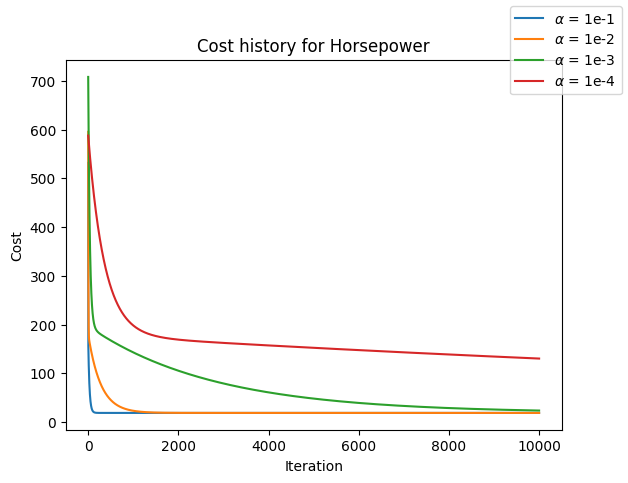

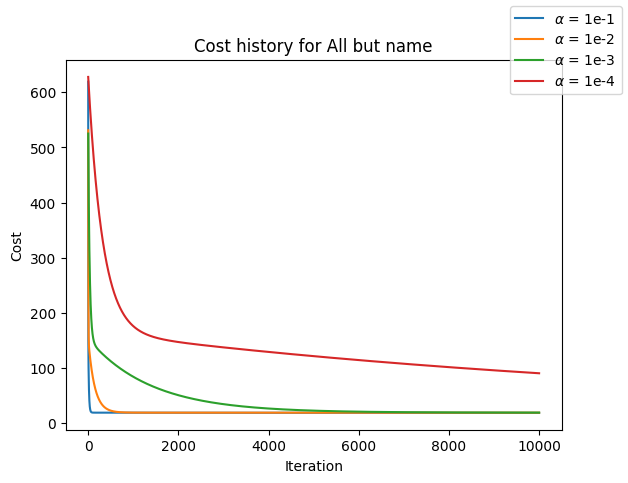

In [27]:
learning_rate_vec = [-1, -2, -3, -4]
training_sets = [X_train_normalized[:, 3].reshape(-1, 1), X_train_normalized]
titles = ["Horsepower", "All but name"]

for X_train, title in zip(training_sets, titles):
    fig, ax = plt.subplots()
    for learning_rate in learning_rate_vec:
        weight, offset, history = train_linear_model(X_train, y_train, 10**4, 10**(learning_rate))
        plot_cost_history(learning_rate, history, ax)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Cost")
    ax.set_title(f"Cost history for {title}")
    fig.legend()